# Neural Net Project

### We'll use the Bank Authentication Data Set from the UCI repository.

##### The data consists of 5 columns:
##### variance of Wavelet Transformed image (continuous)
##### skewness of Wavelet Transformed image (continuous)
##### curtosis of Wavelet Transformed image (continuous)
##### entropy of image (continuous)
##### class (integer)

In [20]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import tensorflow.contrib.learn as skflow
from tensorflow.contrib.learn.python import learn

# Get the Data

In [21]:
#Reading in the data and checking the head of adult
df = pd.read_csv('bank_note_data.csv')
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# EDA

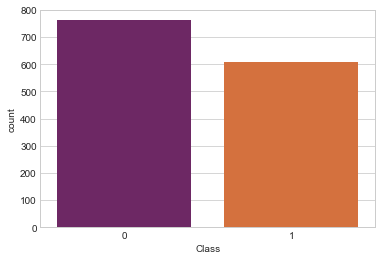

In [22]:
#Create a Countplot of the Classes (Authentic 1 vs Fake 0)
sns.countplot(x='Class',data=df,palette='inferno')

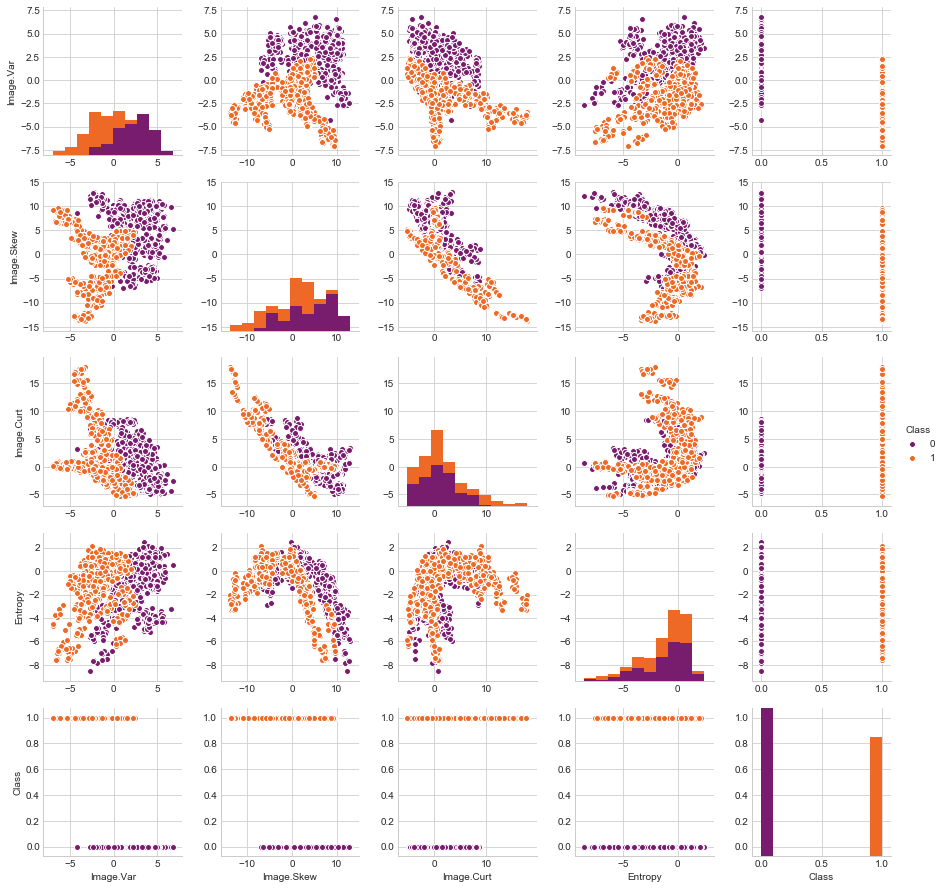

In [23]:
#Create a PairPlot of the Data with Seaborn, set Hue to Class
sns.pairplot(data=df,hue='Class',palette='inferno')

# Train Test Split

In [24]:
#Splitting the data into a train and test set 
x = df[['Image.Var','Image.Skew','Image.Curt','Entropy']].as_matrix()
y = df['Class'].as_matrix()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# Building the Neural Net

In [25]:
#Create an object called classifier which is a DNNClassifier from learn. 
#Set it to have 2 classes and a [10,20,10] hidden unit layer structure:
#Now fit classifier to the training data. Use steps=200 with a batch_size of 20
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[10, 20, 10], n_classes=2)
classifier.fit(x_train, y_train, steps=200, batch_size=20)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': None, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\rohit\\AppData\\Local\\Temp\\tmp8qddu00n', '_environment': 'local', '_session_config': None, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_save_checkpoints_secs': 600, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000245DDEC6400>, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_task_type': None, '_num_worker_replicas': 0}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCom

DNNClassifier(params={'hidden_units': [10, 20, 10], 'activation_fn': <function relu at 0x00000245D4F61620>, 'gradient_clip_norm': None, 'dropout': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'embedding_lr_multipliers': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x00000245E1766DA0>, 'input_layer_min_slice_size': None})

# Predictions

In [26]:
#Model Evaluation
predictions = list(classifier.predict(x_test))

print('classification_report')
print(classification_report(y_test,predictions))
print('\n')
print('confusion_matrix')
print(confusion_matrix(y_test,predictions))

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from C:\Users\rohit\AppData\Local\Temp\tmp8qddu00n\model.ckpt-200
classification_report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       238
          1       1.00      1.00      1.00       174

avg / total       1.00      1.00      1.00       412



confusion_matrix
[[238   0]
 [  0 174]]


### We did very well! Almost suspiciously well! 